<a href="https://colab.research.google.com/github/Keshav1506/Ted-Talks-views-Prediction-Model/blob/main/Ted_Talk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TED TALKS Views Prediction**
****
TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

##**Objective**
****
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

##**Importing Neccessary Libraries**

In [37]:
# Importing Neccessary Packages.

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt


##**Data Gathering and Discovery**
***

In [38]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Capstone Project 2 - Ted Talk Views Prediction/"

# Importing TED Talks Data File.
Ted_talks = pd.read_csv(Data_path + "data_ted_talks.csv")

In [40]:
Ted_talks.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [41]:
Ted_talks.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [42]:
Ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [43]:
Ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

##**EDA on TED Talks Dataset**

**Views** :-

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


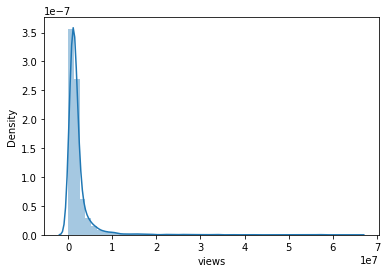

In [44]:
sns.distplot(Ted_talks["views"])

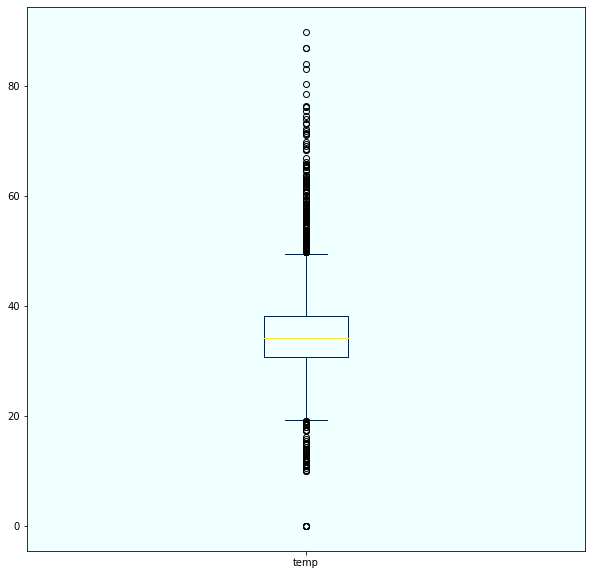

In [45]:
# Making a temporary column with Fourth root of 'views' column such that we can visualize it using a box plot.
Ted_talks["temp"] = np.power(Ted_talks["views"], 1/4)

# Plotting the Box plot on "temp" column.
Ted_talks.plot(y = "temp", kind = "box", figsize = (10,10), colormap = "cividis").patch.set_facecolor('#f0ffff')

# Dropping the 'temp' column since its irrelevant 
Ted_talks.drop(axis = 1, labels = ["temp"], inplace = True)

In [46]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

In [47]:
Ted_talks["all_speakers"].fillna(value = str({0:""}), axis = 0, inplace=True)

Dropping Rows with 0 Views

In [48]:
li = Ted_talks[Ted_talks["comments"]>1000].index
Ted_talks.drop(labels = li, axis = 0, inplace = True)

In [49]:
Ted_talks["comments"].fillna(Ted_talks["comments"].median(), axis = 0, inplace = True)

In [50]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

##**Feature Engineering**
***

In [51]:
Ted_talks.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


In [52]:
Ted_talks["all_speakers_count"] = Ted_talks["all_speakers"].apply(lambda x: len(eval(x)))

In [53]:
from datetime import datetime
import datetime as dt
Ted_talks['published_date'] = Ted_talks['published_date'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

Ted_talks['year'] = Ted_talks['published_date'].dt.year
Ted_talks['month'] = Ted_talks['published_date'].dt.month
Ted_talks['day'] = Ted_talks["published_date"].dt.day_name()

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
Ted_talks['daynum'] = Ted_talks['day'].map(daydict)

Ted_talks['weekdays_weekend']=Ted_talks['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Ted_talks=Ted_talks.drop(columns=['published_date'],axis=1)

In [54]:
Ted_talks["year_recency"] = 2021 - Ted_talks["year"]
Ted_talks["per_annum_views"] = Ted_talks["views"]//Ted_talks["year_recency"]

In [55]:
Ted_talks["native_lang"] = Ted_talks["native_lang"].apply(lambda x: 0 if x == "en" else 1)

In [56]:
Ted_talks["available_lang_count"] = Ted_talks["available_lang"].apply(lambda x: len(eval(x)))

In [57]:
Ted_talks["topics_covered"] = Ted_talks["topics"].apply(lambda x: len(eval(x)))

In [58]:
d = {}
for row in Ted_talks.index:
    list_of_topics = Ted_talks["topics"][row]
    list_of_topics = list_of_topics.strip('][').split(', ')
    
    for topic in list_of_topics:
        topic = topic[1:len(topic)-1]
        d[topic] = d.get(topic, 0) + 1

In [59]:
def weight_of_topic(x):
    x = eval(x)
    for i in range(len(x)):
        x[i] = d[str(x[i])]
    weight = sum(x)
    return weight

Ted_talks["topics_weight"] = Ted_talks["topics"].apply(lambda x: weight_of_topic(x))
    

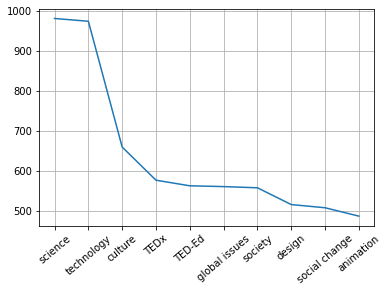

In [60]:

from operator import itemgetter
  
ddd = dict(sorted(d.items(), key = itemgetter(1), reverse = True)[:10])

myList = ddd.items()
# myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.xticks(rotation = 40)
plt.grid()
plt.show()

In [61]:
Ted_talks['words_count_descp'] = Ted_talks['description'].str.split().apply(len)

In [62]:
Ted_talks.drop(axis = 1, labels = ["talk_id", "all_speakers", "title", "occupations", 
                                    "recorded_date", "about_speakers", 
                                   "related_talks", "url", 
                                   "transcript", "speaker_1", "event",  "available_lang",
                                  "topics", "description", "day", "month", "year"], inplace = True)

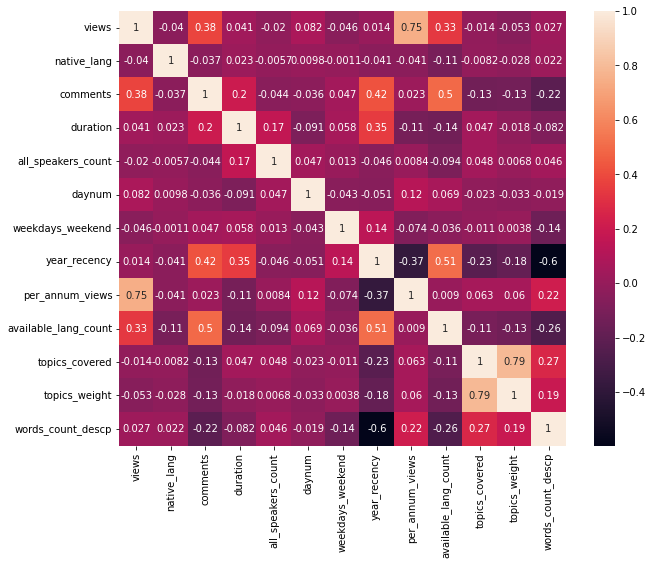

In [63]:
correlmap = Ted_talks.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [64]:
Ted_talks.head(1)

,views,native_lang,comments,duration,all_speakers_count,daynum,weekdays_weekend,year_recency,per_annum_views,available_lang_count,topics_covered,topics_weight,words_count_descp
0,3523392,0,272.0,977,1,2,0,15,234892,43,9,3796,39
